In [1]:
import pandas as pd

data = pd.read_csv('C:\\Users\Patrice\Desktop\\avocado_prices.csv', 
                   index_col = [0])
data['Date'] = pd.to_datetime(data['Date'])

r = 'region'
t = 'type'
d = 'Date'
ap = 'AveragePrice'

name_list = ['Albany_c', 'Albany_o', 'SanDiego_c', 'SanDiego_o']
pl = {}

for i in name_list:
    split = i.split('_')
    if split[1] == 'c':
        split[1] = 'conventional'
    else:
        split[1] = 'organic'
    dt = data.loc[(data[r] == str(split[0])) & (data[t] == split[1]), [d, ap]]
    dt.sort_values(by = ['Date'], ascending = 'True', inplace = True)
    dt.set_index('Date', inplace = True)
    pl[str(i)] = dt


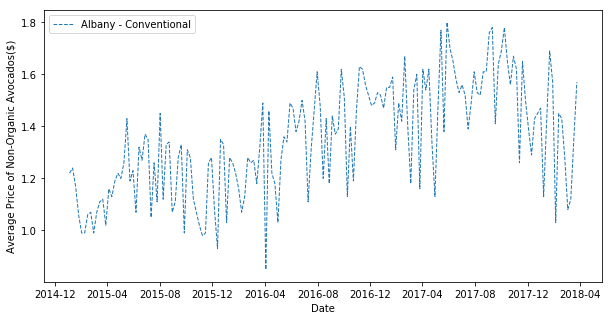

In [3]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [10,5]

plt.plot(pl['Albany_c'].index, pl['Albany_c'], 
         label = 'Albany - Conventional', linewidth = 1, 
         linestyle = 'dashed')
plt.xlabel('Date')
plt.ylabel('Average Price of Non-Organic Avocados($)')
legend()
plt.show()


##For 2 lines (or more) lines on the same graph.
#plt.plot(pl['Albany_o'].index, pl['Albany_o'], pl['SanDiego_o'].index, pl['SanDiego_o'])
#plt.xlabel('Date')
#plt.ylabel('Average Price of Organic Avocados ($)')
#plt.show()

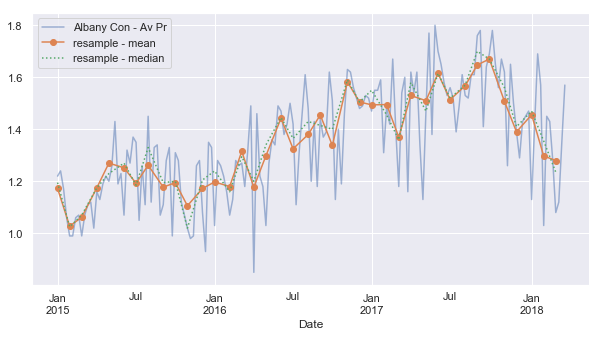

In [4]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

matplotlib.rcParams['figure.figsize'] = [10,5]

ax = pl['Albany_c'].plot(alpha = 0.5, style = '-')
ax = pl['Albany_c'].resample('BM').mean().plot(style='-o', ax = ax)
pl['Albany_c'].resample('BM').median().plot(style=':', ax=ax)
plt.legend(['Albany Con - Av Pr', 'resample - mean', 'resample - median'], loc='upper left')

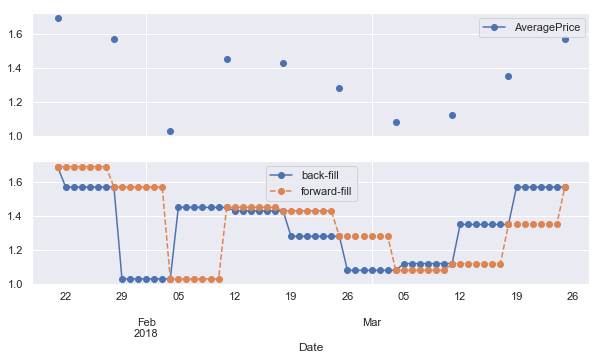

In [5]:
fig, ax = plt.subplots(2, sharex = True)
selection = pl['Albany_c'][-10:]

matplotlib.rcParams['figure.figsize'] = [10,5]

selection.asfreq('D').plot(ax = ax[0], marker='o')

selection.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
selection.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(['back-fill', 'forward-fill']);

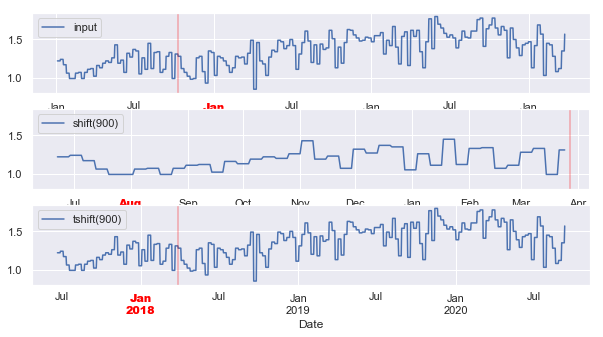

In [6]:
fig, ax = plt.subplots(3, sharey=True)

# apply a frequency to the data
selection = pl['Albany_c'].asfreq('D', method='pad')

selection.plot(ax=ax[0])
selection.shift(900).plot(ax=ax[1])
selection.tshift(900).plot(ax=ax[2])

# legends and annotations
local_max = pd.to_datetime('2015-10-10')
offset = pd.Timedelta(900, 'D')

ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[2].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')

ax[1].legend(['shift(900)'], loc=2)
ax[1].get_xticklabels()[2].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ax[2].legend(['tshift(900)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');